In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
Rf = 1.0303
δ = 0.99
γ = 1
λ = 2

# 1. Simulate the distribution for consumption growth with (at least) 104 random draws for ε. 

In [3]:
number = 10**4

consumption_growth = np.zeros(number)

for i in range(number):
    epsilon = np.random.standard_normal()
    
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon)

consumption_growth = pd.DataFrame(consumption_growth, columns = ['Growth'])

consumption_growth

,Growth
0,1.045231
1,1.012611
2,1.027333
3,1.013784
4,0.982524
...,...
9995,0.999042
9996,1.022711
9997,1.024757
9998,1.010057


In [4]:
b0 = np.arange(0,10.1,0.1)

b0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

# 2. Calculate the equilibrium values of x for b0 in the range from 0 to 10, in increments of 0.1 (or less), using bisection search:

# 用error的正负求error等于0的根

In [5]:
def growth_calculation(consumption_growth,x):
    consumption_growth = x*consumption_growth 
    consumption_growth = consumption_growth['Growth'].apply(lambda x: x-1.0303 if x >= 1.0303 else 2*( x-1.0303))
    return consumption_growth

In [6]:
def error_calculation(b0,consumption_growth, x):
    return δ*b0*np.mean(consumption_growth) + δ*x -1

In [9]:
def bisection_search(b0, consumption_growth):
    list_x = []
    
    for b0 in b0:
        flag = True
        x1 = 1
        x2 = 1.1 
        
        while flag:
            
            x = (x1+x2)/2
            
            if float(error_calculation(b0, growth_calculation(consumption_growth, x), x)) < 0: 
                x1 = x
                x = 0.5*(x1+x2)
                
            elif float(error_calculation(b0, growth_calculation(consumption_growth, x), x)) > 0:
                x2 = x
                x = 0.5*(x1+x2)
            flag = abs(float(error_calculation(b0, growth_calculation(consumption_growth, x), x))) > 10**-5 
            
        list_x.append(x)
        
    return list_x      

In [10]:
x_values = bisection_search(b0,consumption_growth)

x_values = pd.DataFrame(x_values, columns = ['x_values'])

x_values

,x_values
0,1.010107
1,1.010693
2,1.011133
3,1.011499
4,1.011792
...,...
96,1.014410
97,1.014413
98,1.014417
99,1.014420


# 3. Use the equilibrium value of x to calculate the price-dividend ratio for the market portfolio:

In [16]:
price_dividend_ratio = 1/(x_values['x_values'] - 1)
price_dividend_ratio

0      98.937198
1      92.879819
2      88.658009
3      85.511482
4      83.167513
         ...    
96     66.699913
97     66.682947
98     66.669379
99     66.655818
100    66.642262
Name: x_values, Length: 101, dtype: float64

# 4. Plot the price-dividend ratio (on the vertical axis) vs b0.

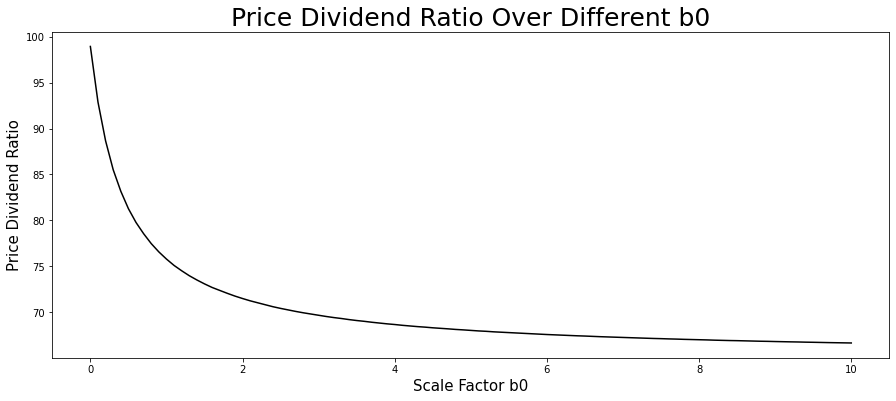

In [32]:
plt.figure(figsize = (15,6))
plt.xlabel('Scale Factor b0', fontsize = 15)
plt.ylabel('Price Dividend Ratio', fontsize = 15)
plt.title('Price Dividend Ratio Over Different b0', fontsize = 25)
plt.plot(b0, price_dividend_ratio, color = 'k')
plt.show()

# 5. Use the equilibrium value of x to calculate the expected market return 

In [30]:
x_g = np.dot(x_values, consumption_growth.T)

Expected_Market_Return = np.mean(x_g, axis = 1)

Expected_Market_Return

array([1.03066314, 1.03133574, 1.03185886, 1.03228235, 1.03261865,
       1.03290512, 1.03314178, 1.03334106, 1.03352167, 1.03367736,
       1.03381437, 1.03393892, 1.0340448 , 1.03414444, 1.03423163,
       1.03431259, 1.03438732, 1.0344496 , 1.03451187, 1.03457104,
       1.03462397, 1.0346738 , 1.03471739, 1.03476098, 1.03480458,
       1.03484194, 1.0348762 , 1.03491045, 1.03494159, 1.03496961,
       1.03499764, 1.03502566, 1.03505057, 1.03507237, 1.03509728,
       1.03511908, 1.03513776, 1.03515956, 1.03517824, 1.03519692,
       1.03521249, 1.03523118, 1.03524675, 1.03526231, 1.03527477,
       1.03529034, 1.0353028 , 1.03531525, 1.03532926, 1.03534016,
       1.03535262, 1.03536507, 1.03537441, 1.03538687, 1.03539621,
       1.03540555, 1.03541489, 1.03542424, 1.03543358, 1.03544292,
       1.03545226, 1.03546005, 1.03546783, 1.03547561, 1.0354834 ,
       1.03548963, 1.03549741, 1.0355052 , 1.03551142, 1.03551765,
       1.03552388, 1.03553011, 1.03553633, 1.03554256, 1.03554

# 6. Plot the equity premium (on the vertical axis) vs b0. 

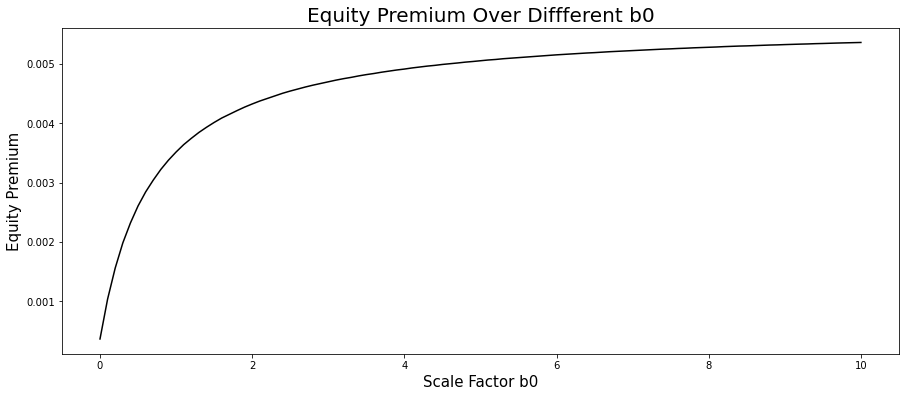

In [33]:
plt.figure(figsize = (15,6))

plt.xlabel('Scale Factor b0', fontsize = 15)

plt.ylabel('Equity Premium',fontsize = 15)

plt.title('Equity Premium Over Diffferent b0', fontsize = 20)

plt.plot(b0, Expected_Market_Return - Rf, color = 'k')

plt.show()

# 7.Briefly explain the economic significance of the investor's utility function for recent financial gain or loss [ν(R)], as well as the economic significance of b0 and λ

## Utility Function with recent financial gain or loss is also called Quasi-behavioral model by incorporating the prospect theory in the utility function. By short,  if two choices are made for the investors, investors will choose the option with more potential gains based on 'loss aversion'. 

## b0 measures the extent of emphasis a investor put on the financial gain or loss for  the whole utility funciton. 

## λ measures the degree of loss aversion for an investor when he faces loss.  If λ >1, then the investor will be more sensitive to loss than gains comparing to the reference level. 